# Cifar100

Epoch 1/100
390/390 [==============================] - 52s 127ms/step - loss: 4.3588 - accuracy: 0.0856 - val_loss: 3.6458 - val_accuracy: 0.1502
Epoch 2/100
390/390 [==============================] - 48s 122ms/step - loss: 3.5682 - accuracy: 0.1667 - val_loss: 3.1191 - val_accuracy: 0.2407
Epoch 3/100
390/390 [==============================] - 50s 128ms/step - loss: 3.1845 - accuracy: 0.2243 - val_loss: 3.0302 - val_accuracy: 0.2663
Epoch 4/100
390/390 [==============================] - 44s 112ms/step - loss: 2.9276 - accuracy: 0.2709 - val_loss: 2.7804 - val_accuracy: 0.3033
Epoch 5/100
390/390 [==============================] - 43s 111ms/step - loss: 2.7396 - accuracy: 0.3030 - val_loss: 2.5579 - val_accuracy: 0.3501
Epoch 6/100
390/390 [==============================] - 42s 108ms/step - loss: 2.5831 - accuracy: 0.3319 - val_loss: 2.4537 - val_accuracy: 0.3795
Epoch 7/100
390/390 [==============================] - 45s 114ms/step - loss: 2.4813 - accuracy: 0.3548 - val_loss: 2.2650 -

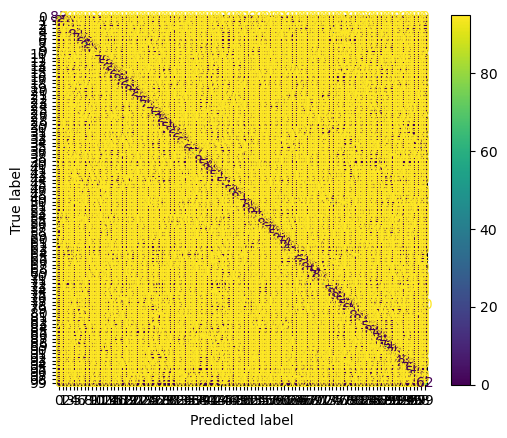

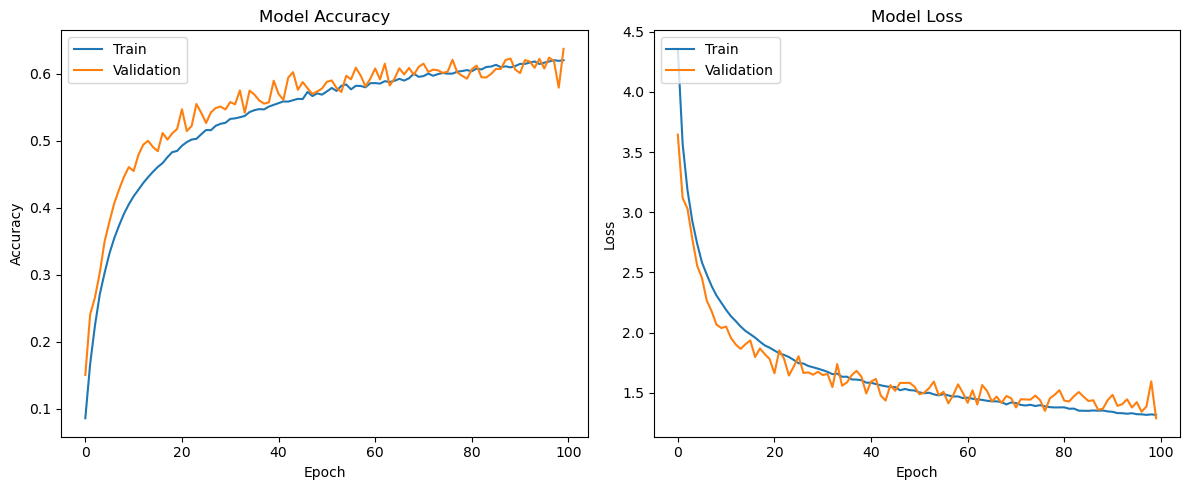

In [13]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import time

def criacaoModeloC100():
    opt=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, input_shape=(32, 32, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.35))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.45))

    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='softmax'))
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)
    return model

def avaliacao_statistica(test_X, test_y):
    predictions = model.predict(test_X) # Previsões
    classePredita = np.argmax(predictions, axis=1)
    classeVerdadeira = np.argmax(test_y, axis=1)
    cm = confusion_matrix(classeVerdadeira, classePredita)
    ConfusionMatrixDisplay(cm).plot()  # classePredita para matrix de confusao
    acc = accuracy_score(classeVerdadeira, classePredita) * 100  # Acuracia
    print("Acuracia: ", '%.3f' % (acc*1.0))
    sens = recall_score(classeVerdadeira, classePredita, average='macro')  # Sensibilidade
    print("Sensibilidade: ", '%.3f' % (sens*1.0))


def plotAcuraciaLoss(history): #plots
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico  # Primeiro gráfico (accuracy)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo gráfico # Segundo gráfico (loss)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.tight_layout() # Exibir os gráficos

(train_X, train_y), (test_X, test_y) = cifar100.load_data() # Carregar o conjunto de dados # Importar e Treinar

train_X = train_X.reshape((train_X.shape[0], 32, 32, 3))   # Ajuste da dimensão
test_X = test_X.reshape((test_X.shape[0], 32, 32, 3))    # Ajuste da dimensão
train_X = train_X.astype("float")/255   # not train_x
test_X = test_X.astype("float")/255     # not test_x


train_y = to_categorical(train_y, 100)
test_y = to_categorical(test_y, 100)

datagen = ImageDataGenerator(rotation_range=15,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)
datagen.fit(train_X)

model = criacaoModeloC100()
inicio = time.time() #tempo de inicio
history=model.fit(datagen.flow(train_X, train_y, batch_size=128),
                    steps_per_epoch = len(train_X) / 128, epochs=100, validation_data=(test_X, test_y))
treinamentoF = time.time() #tempo final
tempoTreino = round(treinamentoF - inicio,2)
print("Tempo de treinamento: ", tempoTreino)
avaliacao_statistica(test_X, test_y)
plotAcuraciaLoss(history)

In [ ]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import time

def criacaoModeloC100():
    opt=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, input_shape=(32, 32, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.35))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.45))
    
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.45))    

    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='softmax'))
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)
    return model

def avaliacao_statistica(test_X, test_y):
    predictions = model.predict(test_X) # Previsões
    classePredita = np.argmax(predictions, axis=1)
    classeVerdadeira = np.argmax(test_y, axis=1)
    cm = confusion_matrix(classeVerdadeira, classePredita)
    ConfusionMatrixDisplay(cm).plot()  # classePredita para matrix de confusao
    acc = accuracy_score(classeVerdadeira, classePredita) * 100  # Acuracia
    print("Acuracia: ", '%.3f' % (acc*1.0))
    sens = recall_score(classeVerdadeira, classePredita, average='macro')  # Sensibilidade
    print("Sensibilidade: ", '%.3f' % (sens*1.0))


def plotAcuraciaLoss(history): #plots
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico  # Primeiro gráfico (accuracy)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo gráfico # Segundo gráfico (loss)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.tight_layout() # Exibir os gráficos

(train_X, train_y), (test_X, test_y) = cifar100.load_data() # Carregar o conjunto de dados # Importar e Treinar

train_X = train_X.reshape((train_X.shape[0], 32, 32, 3))   # Ajuste da dimensão
test_X = test_X.reshape((test_X.shape[0], 32, 32, 3))    # Ajuste da dimensão
train_X = train_X.astype("float")/255   # not train_x
test_X = test_X.astype("float")/255     # not test_x


train_y = to_categorical(train_y, 100)
test_y = to_categorical(test_y, 100)

datagen = ImageDataGenerator(rotation_range=15,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)
datagen.fit(train_X)

model = criacaoModeloC100()
inicio = time.time() #tempo de inicio
history=model.fit(datagen.flow(train_X, train_y, batch_size=128),
                    steps_per_epoch = len(train_X) / 128, epochs=100, validation_data=(test_X, test_y))
treinamentoF = time.time() #tempo final
tempoTreino = round(treinamentoF - inicio,2)
print("Tempo de treinamento: ", tempoTreino)
avaliacao_statistica(test_X, test_y)
plotAcuraciaLoss(history)

Epoch 1/100
390/390 [==============================] - 299s 715ms/step - loss: 4.5488 - accuracy: 0.0605 - val_loss: 4.1537 - val_accuracy: 0.0742
Epoch 2/100
390/390 [==============================] - 204s 523ms/step - loss: 3.8311 - accuracy: 0.1239 - val_loss: 3.6838 - val_accuracy: 0.1498
Epoch 3/100
390/390 [==============================] - 214s 547ms/step - loss: 3.4689 - accuracy: 0.1762 - val_loss: 3.3165 - val_accuracy: 0.2087
Epoch 4/100
390/390 [==============================] - 203s 520ms/step - loss: 3.1993 - accuracy: 0.2217 - val_loss: 2.9625 - val_accuracy: 0.2596
Epoch 5/100
390/390 [==============================] - 218s 558ms/step - loss: 2.9716 - accuracy: 0.2581 - val_loss: 2.7762 - val_accuracy: 0.2934
Epoch 6/100
390/390 [==============================] - 207s 530ms/step - loss: 2.7905 - accuracy: 0.2893 - val_loss: 2.5364 - val_accuracy: 0.3434
Epoch 7/100
390/390 [==============================] - 214s 548ms/step - loss: 2.6418 - accuracy: 0.3170 - val_loss: 2

Epoch 1/100
390/390 [==============================] - 58s 131ms/step - loss: 4.4091 - accuracy: 0.0833 - val_loss: 3.6288 - val_accuracy: 0.1525
Epoch 2/100
390/390 [==============================] - 49s 125ms/step - loss: 3.6248 - accuracy: 0.1603 - val_loss: 3.1749 - val_accuracy: 0.2443
Epoch 3/100
390/390 [==============================] - 48s 122ms/step - loss: 3.2134 - accuracy: 0.2231 - val_loss: 2.9706 - val_accuracy: 0.2724
Epoch 4/100
390/390 [==============================] - 48s 122ms/step - loss: 2.9040 - accuracy: 0.2739 - val_loss: 2.5644 - val_accuracy: 0.3397
Epoch 5/100
390/390 [==============================] - 48s 122ms/step - loss: 2.6949 - accuracy: 0.3095 - val_loss: 2.3378 - val_accuracy: 0.3902
Epoch 6/100
390/390 [==============================] - 49s 127ms/step - loss: 2.5376 - accuracy: 0.3430 - val_loss: 2.4574 - val_accuracy: 0.3708
Epoch 7/100
390/390 [==============================] - 67s 171ms/step - loss: 2.4178 - accuracy: 0.3676 - val_loss: 2.1284 -

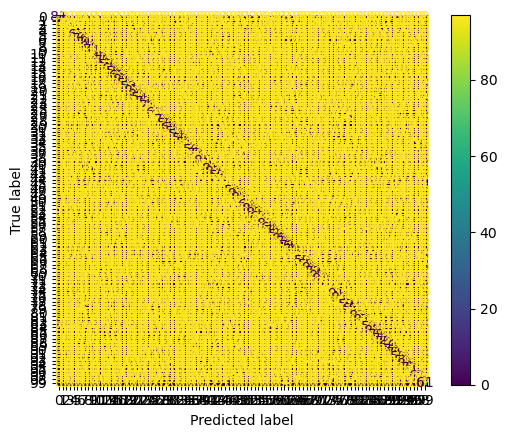

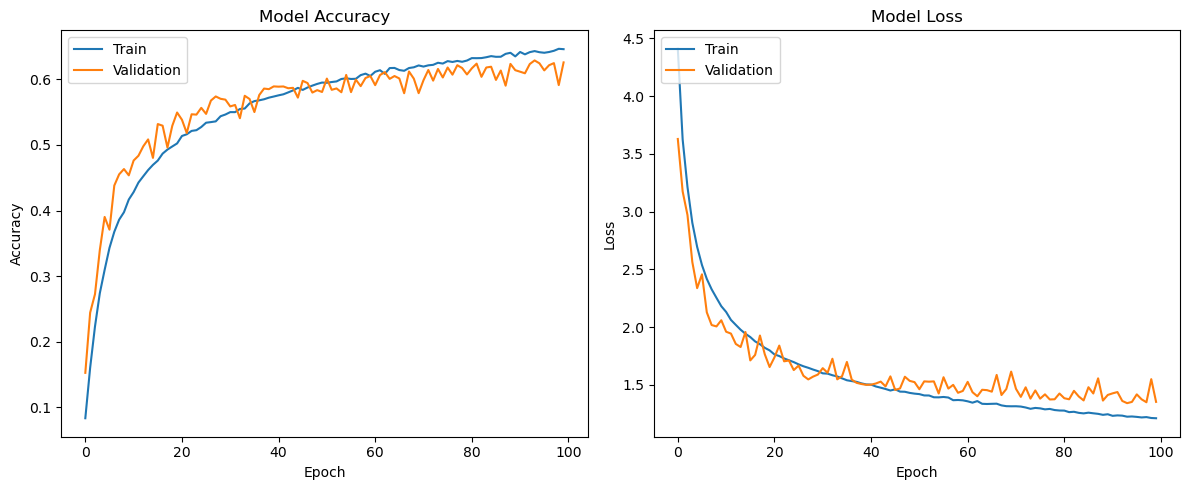

In [1]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import time

def criacaoModeloC100():
    opt=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

    model = Sequential()
    model.add(Conv2D(32, (4, 4), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, input_shape=(32, 32, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (4, 4), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (4, 4), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (4, 4), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.35))

    model.add(Conv2D(128, (4, 4), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (4, 4), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.45))

    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=None))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='softmax'))
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)
    return model

def avaliacao_statistica(test_X, test_y):
    predictions = model.predict(test_X) # Previsões
    classePredita = np.argmax(predictions, axis=1)
    classeVerdadeira = np.argmax(test_y, axis=1)
    cm = confusion_matrix(classeVerdadeira, classePredita)
    ConfusionMatrixDisplay(cm).plot()  # classePredita para matrix de confusao
    acc = accuracy_score(classeVerdadeira, classePredita) * 100  # Acuracia
    print("Acuracia: ", '%.3f' % (acc*1.0))
    sens = recall_score(classeVerdadeira, classePredita, average='macro')  # Sensibilidade
    print("Sensibilidade: ", '%.3f' % (sens*1.0))


def plotAcuraciaLoss(history): #plots
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico  # Primeiro gráfico (accuracy)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo gráfico # Segundo gráfico (loss)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.tight_layout() # Exibir os gráficos

(train_X, train_y), (test_X, test_y) = cifar100.load_data() # Carregar o conjunto de dados # Importar e Treinar

train_X = train_X.reshape((train_X.shape[0], 32, 32, 3))   # Ajuste da dimensão
test_X = test_X.reshape((test_X.shape[0], 32, 32, 3))    # Ajuste da dimensão
train_X = train_X.astype("float")/255   # not train_x
test_X = test_X.astype("float")/255     # not test_x


train_y = to_categorical(train_y, 100)
test_y = to_categorical(test_y, 100)

datagen = ImageDataGenerator(rotation_range=15,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)
datagen.fit(train_X)

model = criacaoModeloC100()
inicio = time.time() #tempo de inicio
history=model.fit(datagen.flow(train_X, train_y, batch_size=128),
                    steps_per_epoch = len(train_X) / 128, epochs=100, validation_data=(test_X, test_y))
treinamentoF = time.time() #tempo final
tempoTreino = round(treinamentoF - inicio,2)
print("Tempo de treinamento: ", tempoTreino)
avaliacao_statistica(test_X, test_y)
plotAcuraciaLoss(history)